In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

2024-03-15 20:11:47.611471: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-15 20:11:47.611566: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-15 20:11:47.735099: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


/kaggle/input/slash-task-dataset/Data-slash/nutrition/nutrition (6).jpg
/kaggle/input/slash-task-dataset/Data-slash/nutrition/nutrition (3).jpg
/kaggle/input/slash-task-dataset/Data-slash/nutrition/nutrition (13).jpg
/kaggle/input/slash-task-dataset/Data-slash/nutrition/nutrition (12).jpg
/kaggle/input/slash-task-dataset/Data-slash/nutrition/nutrition (14).jpg
/kaggle/input/slash-task-dataset/Data-slash/nutrition/nutrition (9).jpg
/kaggle/input/slash-task-dataset/Data-slash/nutrition/nutrition (15).jpg
/kaggle/input/slash-task-dataset/Data-slash/nutrition/nutrition (11).jpg
/kaggle/input/slash-task-dataset/Data-slash/nutrition/nutrition (16).jpg
/kaggle/input/slash-task-dataset/Data-slash/nutrition/nutrition (4).jpg
/kaggle/input/slash-task-dataset/Data-slash/nutrition/nutrition (2).jpg
/kaggle/input/slash-task-dataset/Data-slash/nutrition/nutrition (17).jpg
/kaggle/input/slash-task-dataset/Data-slash/nutrition/nutrition (8).jpg
/kaggle/input/slash-task-dataset/Data-slash/nutrition/nut

In [2]:
!pip install split-folders

import splitfolders

# Define input and output directories
input_folder = '/kaggle/input/slash-task-dataset/Data-slash'
output_folder = 'Data-split'

# Split the dataset into train and validation sets with a ratio of 80% train and 20% validation
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(0.8, 0.2))


/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Copying files: 33 files [00:00, 104.09 files/s]


In [3]:
data_train_path = '/kaggle/working/Data-split/train'
# data_test_path = 'Fruits_Vegetables/test'
data_val_path = '/kaggle/working/Data-split/val'

In [4]:
img_width = 180
img_height =180 

In [5]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 25 files belonging to 2 classes.


In [6]:
data_cat = data_train.class_names

In [7]:
data_cat

['fashion', 'nutrition']

In [8]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 8 files belonging to 2 classes.


Found 8 images belonging to 2 classes.
Found 8 files belonging to 2 classes.


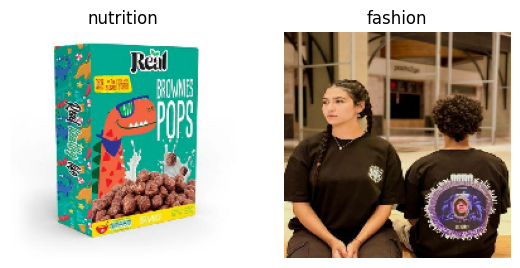

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(

)

# Generate augmented images
augmented_val_data = datagen.flow_from_directory(
    data_val_path,
    target_size=(img_width, img_height),
    batch_size=32,
    shuffle=True
)

# Convert augmented_train_data to TensorFlow dataset
augmented_data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)


# Plot some augmented images
plt.figure(figsize=(10, 10))
for batch in augmented_data_val.take(1):
    images, labels = batch
    for i in range(2):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')
    break  # only plot one batch of images
plt.show()

Found 25 images belonging to 2 classes.
Found 25 files belonging to 2 classes.


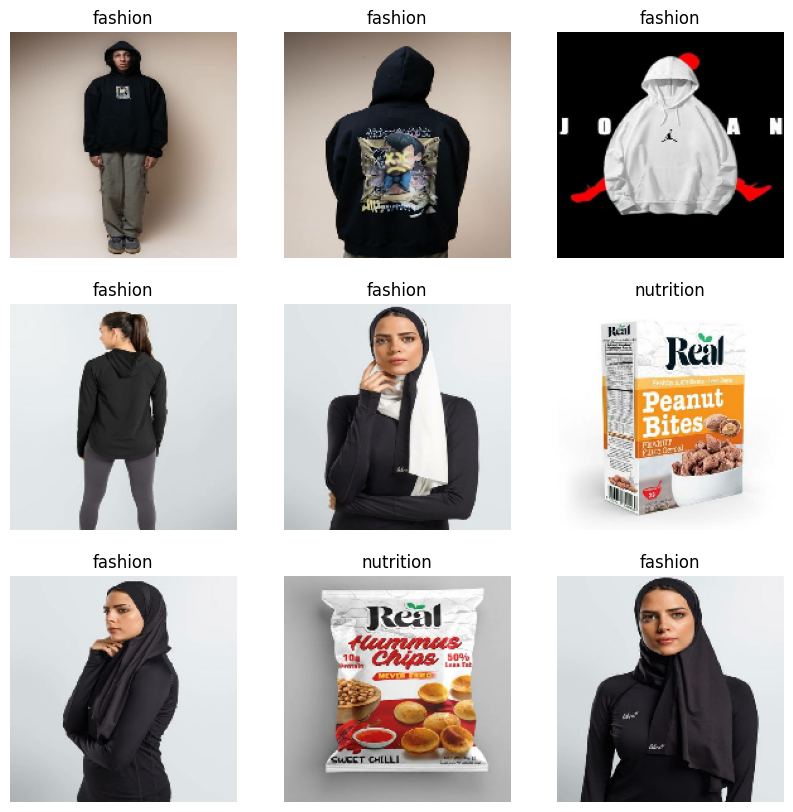

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    zoom_range=0.2,  
    horizontal_flip=True,
    vertical_flip=True, 
    brightness_range=[0.5, 1.5] 
)

# Generate augmented images
augmented_train_data = datagen.flow_from_directory(
    data_train_path,
    target_size=(img_width, img_height),
    batch_size=32,
    shuffle=True
)

# Convert augmented_train_data to TensorFlow dataset
augmented_data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)


# Plot some augmented images
plt.figure(figsize=(10, 10))
for batch in augmented_data_train.take(1):
    images, labels = batch
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')
    break  # only plot one batch of images
plt.show()

In [11]:
# Calculate the number of original images in the training dataset
num_batches = 0
for _ in data_train:
    num_batches += 1

batch_size = 32
num_original_images = num_batches * batch_size

# Calculate the number of additional images generated through augmentation
# The number of augmented images generated per original image is the same as the number of images in one batch of augmented_train_data
num_augmented_images_per_original = augmented_train_data.batch_size

# Add the counts together
overall_train_dataset_size = num_original_images + (num_augmented_images_per_original * num_original_images)

print("Overall training dataset size after augmentation:", overall_train_dataset_size)


Overall training dataset size after augmentation: 1056


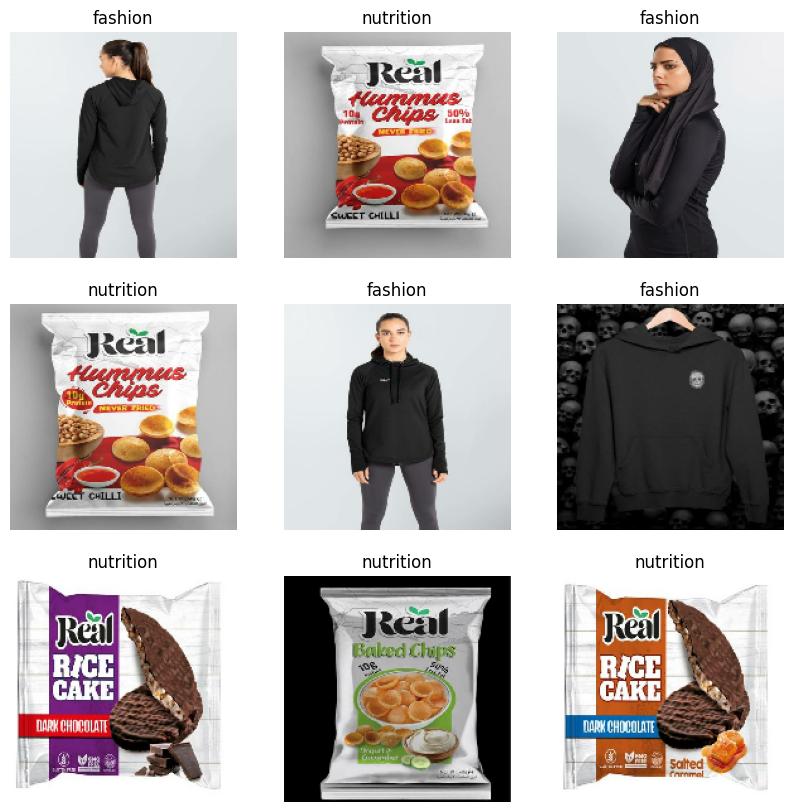

In [12]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [13]:
from tensorflow.keras.models import Sequential

In [14]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [15]:
augmented_train_data

In [16]:
from tensorflow.keras import layers, Sequential, regularizers

model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.2),
    layers.Dense(len(data_cat), activation='softmax')
])

In [17]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [18]:
# # Compile the model with appropriate loss function
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model using model.fit
epochs_size = 11
history = model.fit(augmented_data_train, validation_data=augmented_data_val, epochs=epochs_size)


Epoch 1/11


/opt/conda/lib/python3.10/site-packages/keras/src/backend/tensorflow/nn.py:599: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.4000 - loss: 1.2233 - val_accuracy: 0.5000 - val_loss: 5.5814
Epoch 2/11
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5200 - loss: 5.2948 - val_accuracy: 0.5000 - val_loss: 3.0644
Epoch 3/11
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 775ms/step - accuracy: 0.4800 - loss: 2.6906 - val_accuracy: 0.5000 - val_loss: 1.1124
Epoch 4/11
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6400 - loss: 0.9128 - val_accuracy: 0.7500 - val_loss: 0.9159
Epoch 5/11
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.8000 - loss: 0.7585 - val_accuracy: 0.7500 - val_loss: 0.8944
Epoch 6/11
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.8400 - loss: 0.7119 - val_accuracy: 0.7500 - val_loss: 0.9228
Epoch 7/11
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.6841 - val_accuracy: 0.7500 - val_loss: 0.8327
Epoch 8/11
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 781ms/step - accuracy: 1.0000 - loss: 0.5781 - val_accuracy: 0.7500 - val_loss: 0.7929
Epoch 9/11
1/1 ━━━━━━

Text(0.5, 1.0, 'Loss')

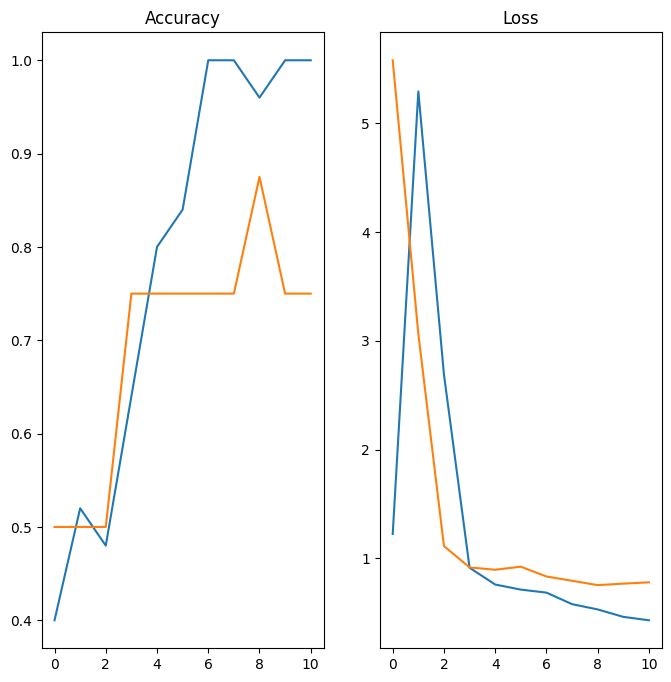

In [19]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [20]:
image = '/kaggle/input/testtt/Screenshot_20240315_215026.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [21]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


In [22]:
score = tf.nn.softmax(predict)

In [23]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is fashion with accuracy of 66.49


In [24]:
image = '/kaggle/input/testtt/Screenshot_20240315_215704.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [25]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [26]:
score = tf.nn.softmax(predict)

In [27]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is nutrition with accuracy of 66.52
